In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Load the dataset from cifar-10

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


### Visualize the dataset

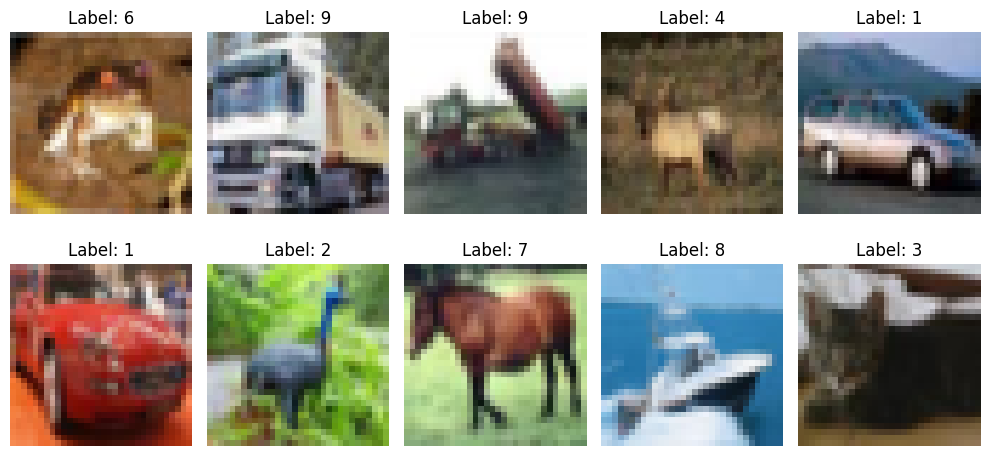

In [5]:
# Display some images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [6]:
unique_labels = np.unique(y_train)
print("Unique Labels:", unique_labels)

Unique Labels: [0 1 2 3 4 5 6 7 8 9]


### Data Inspection

In [7]:
image= x_train[0]
image_array= np.array(image)
print(image_array)
print("max value:",image_array.max())
print("min value:",image_array.min())

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
max value: 255
min value: 0


### Data Normalization

In [8]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

### Data Split for training and validation

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [34]:
# Clear the previous session (optional)
tf.keras.backend.clear_session()

In [11]:
x_train[0].shape

(32, 32, 3)

### Build Model

In [35]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),  
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 3
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'), 
    layers.MaxPooling2D((2, 2)),
  
    layers.Flatten(),
    
    # Dropout layer to avoid overfitting
    layers.Dropout(0.5),
    
    # Fully Connected Layer 1
    layers.Dense(256, activation='relu'),
    
    # Dropout layer
    layers.Dropout(0.5),
    
    # Output Layer (10 classes for CIFAR-10)
    layers.Dense(10, activation='softmax') 
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321,290 (1.23 MB)

 Trainable params: 321,290 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras.optimizers import Adam

In [38]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a checkpoint callback to save the model weights
checkpoint_callback = ModelCheckpoint(
    'model_checkpoint.weights.h5',  # Change file extension to .weights.h5
    save_weights_only=True,  # Save only the model weights, not the entire model
    save_best_only=True,     # Save only the best model based on validation loss
    monitor='val_loss',      # Monitor validation loss
    mode='min'             # Save the model when validation loss decreases              
)


In [40]:
# Train the model and save checkpoints
history = model.fit(
    x_train, y_train,
    epochs=60,  
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_callback] 
)


Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2771 - loss: 1.9380 - val_accuracy: 0.5120 - val_loss: 1.3502
Epoch 2/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4807 - loss: 1.4301 - val_accuracy: 0.5605 - val_loss: 1.2250
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5475 - loss: 1.2595 - val_accuracy: 0.6281 - val_loss: 1.0592
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5883 - loss: 1.1493 - val_accuracy: 0.6545 - val_loss: 0.9578
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6193 - loss: 1.0656 - val_accuracy: 0.6632 - val_loss: 0.9532
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6428 - loss: 1.0094 - val_accuracy: 0.6902 - val_loss: 0.8878
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6618 - loss: 0.9524 - val_accuracy: 0.7031 - val_loss: 0.8358
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6743 - loss: 0.9177 - 

### Visualize accuracy and loss over epochs 

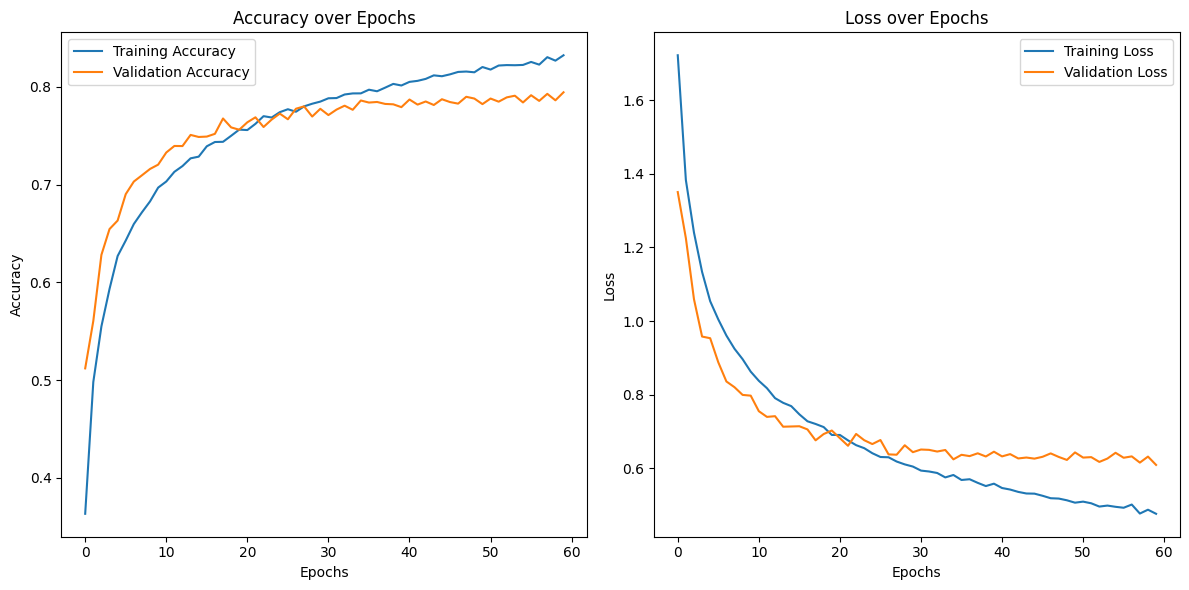

In [41]:
import matplotlib.pyplot as plt


# Extract accuracy and loss values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


### Model Prediction

In [43]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
predicted_labels = predictions.argmax(axis=1) 

for true, pred in zip(y_test[:10], predicted_labels[:10]):
    print(f"Original: {true}, Predicted: {pred}")


Original: 3, Predicted: 3
Original: 8, Predicted: 8
Original: 8, Predicted: 8
Original: 0, Predicted: 0
Original: 6, Predicted: 6
Original: 6, Predicted: 6
Original: 1, Predicted: 1
Original: 6, Predicted: 6
Original: 3, Predicted: 3
Original: 1, Predicted: 1


### Confusion Matrix

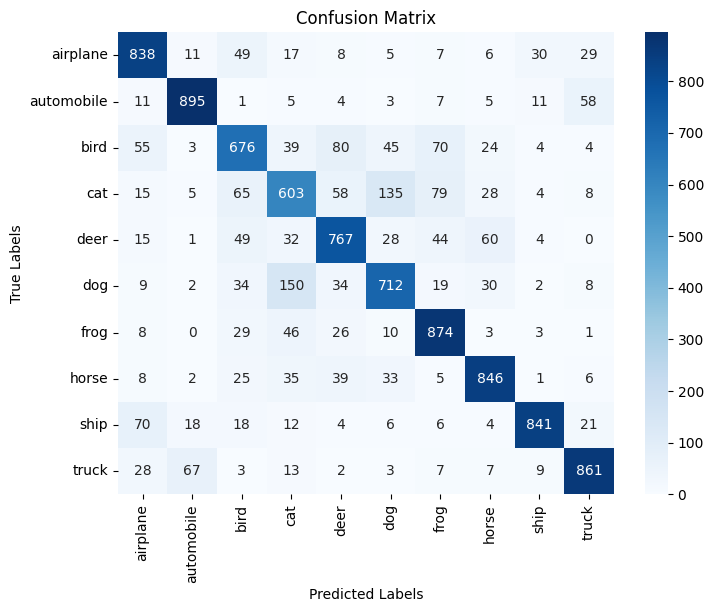

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, predicted_labels)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
